# Data-driven Induction of Shadowed Sets Based on Grade of Fuzziness
### D. Malchiodi and A. M. Zanaboni

## Code enabling the replication of experiments described

### Dependencies on libraries

The code requires a python 2 standard installation along with the following libraries

- numpy
- pandas
- matplotlib
- sklearn

Moreover, the optimization problems are solved through the gurobi optimization tool, available at http://www.gurobi.com/ with free unlimited licenses for academic users.

In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from shadowlearn import shadowed_learn
from shadowlearn.kernel import GaussianKernel, LinearKernel

### Figure 1

In [2]:
def shadowed_plot(xs, ys):
    bars = [0.5 if y==0.5 else 0 for y in ys]
    vals = [0.5 if y==0.5 else y for y in ys]
    plt.errorbar(xs, vals, yerr=bars, fmt='none', ecolor='gray', c='blue')
    ys_m = np.ma.masked_where(np.array(ys)==0.5, ys)
    plt.step(xs, ys_m, linewidth=2, alpha=0.5)

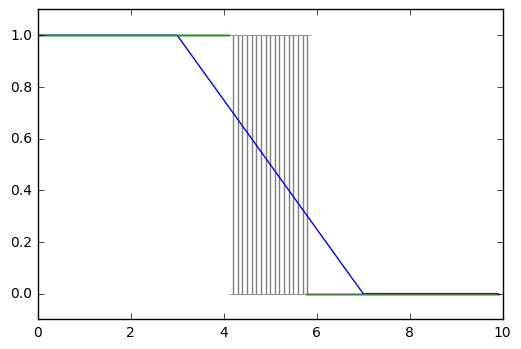

In [3]:
import math

x = np.arange(0, 10, 0.1)
R2 = 3
M = 7

def m(x):
    if x <= R2:
        return 1
    if x > M:
        return 0
    return 1 - (float(x)-R2)/(M-R2)

def s(x):
    alpha = 1-math.sqrt(0.5)
    x_up = R2 + alpha * (M - R2)
    x_dw = R2 + (1-alpha) * (M - R2)
    if x < x_up:
        return 1
    if x > x_dw:
        return 0
    return 0.5

plt.plot(x, map(m, x))
shadowed_plot(x, map(s, x))

plt.ylim(-.1, 1.1)
plt.show()

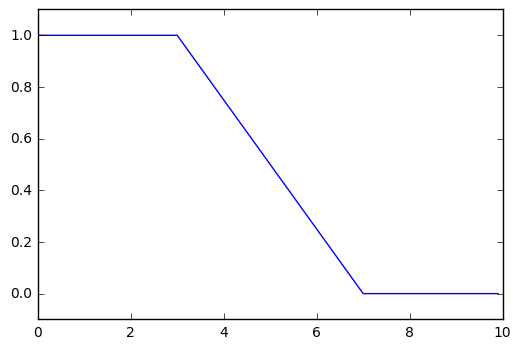

In [4]:
plt.plot(x, map(m, x))
plt.ylim(-.1, 1.1)
plt.show()

### Figure 2

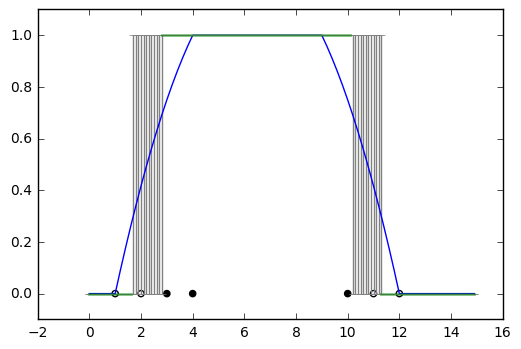

In [5]:
x =  [[1.], [2.], [3.], [4.], [10.], [11.], [12.]]
mu = [0., 0., 1., 1., 1., 0., 0.]
xx = np.arange(0, 15, .1)

m, _, s = shadowed_learn(x, mu, c=.3, d=.3, phi=1, k=LinearKernel(), adjustment=0)
shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

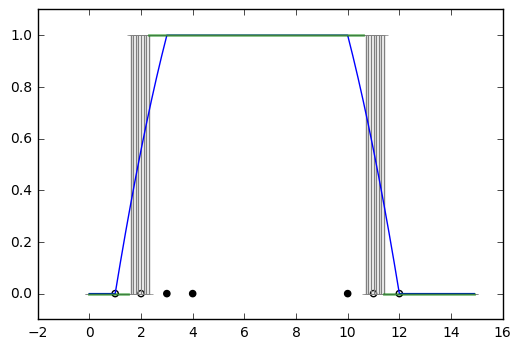

In [6]:
m, _, s = shadowed_learn(x, mu, c=6, d=.3, phi=1, k=LinearKernel(), adjustment=0)

shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

### Figure 3

In [7]:
x =  [[1.], [2.], [3.], [4.], [10.], [11.], [12.]]
mu = [0., 0., 1., 1., 1., 0., 0.]
m, _, s = shadowed_learn(x, mu, c=10, d=0.1, phi=1, k=LinearKernel(), adjustment=0)

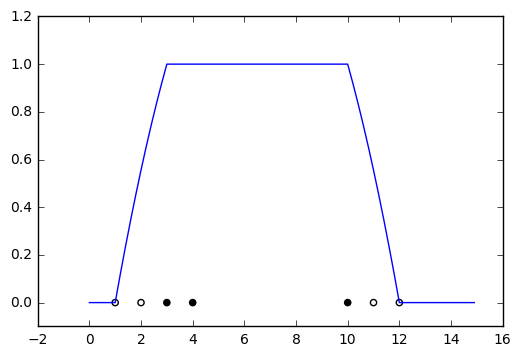

In [8]:
shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.2)
plt.show()

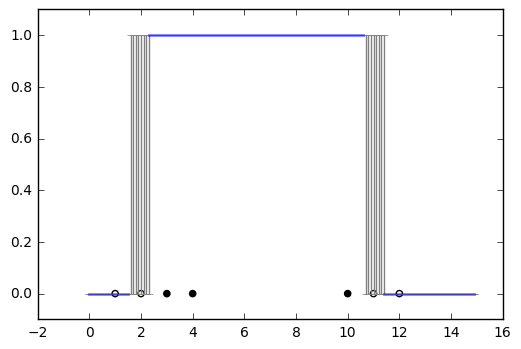

In [9]:
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')
plt.ylim(-.1, 1.1)
plt.show()

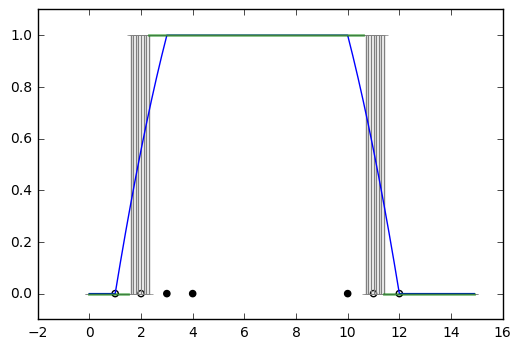

In [10]:
plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

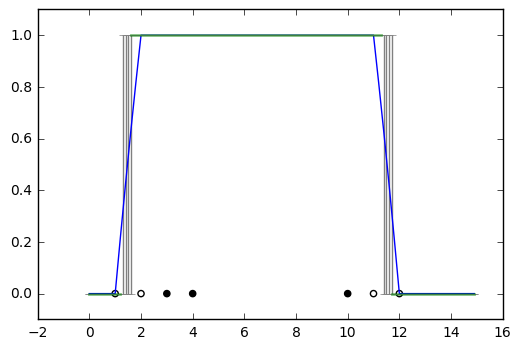

In [11]:
m, _, s = shadowed_learn(x, mu, c=10, d=2, phi=1, k=LinearKernel(), adjustment=0)
shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

### Figure 4

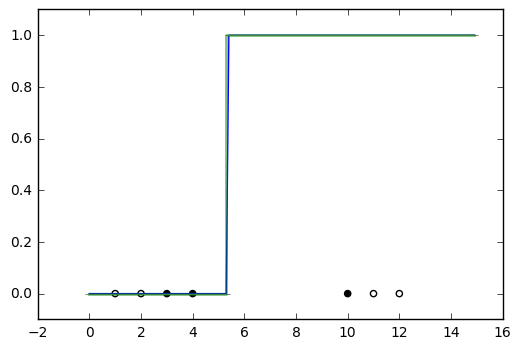

In [12]:
m, _, s = shadowed_learn(x, mu, c=1, d=4, phi=1, k=LinearKernel(), adjustment=0)

shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

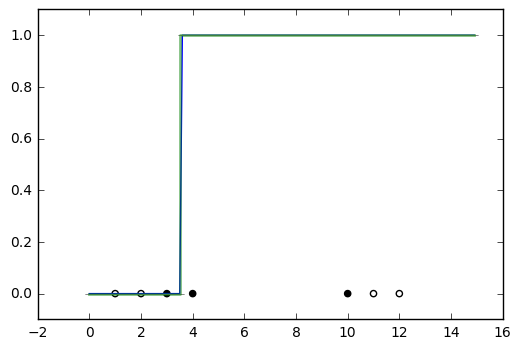

In [13]:
m, _, s = shadowed_learn(x, mu, c=1, d=4, phi=0.6, k=LinearKernel(), adjustment=0)

shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

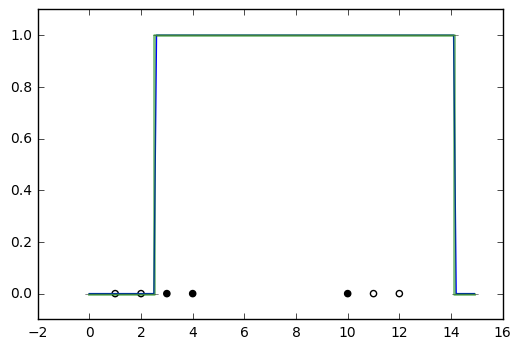

In [14]:
m, _, s = shadowed_learn(x, mu, c=1, d=4, phi=0.4, k=LinearKernel(), adjustment=0)

shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

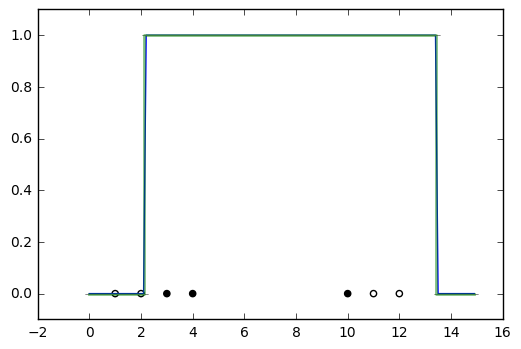

In [15]:
m, _, s = shadowed_learn(x, mu, c=1, d=4, phi=0.3, k=LinearKernel(), adjustment=0)

shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

### Figure 5

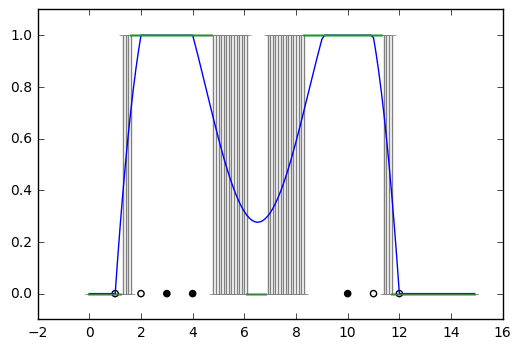

In [16]:
m, _, s = shadowed_learn(x, mu, c=30, d=1, phi=.8, k=GaussianKernel(5), adjustment=0)
shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

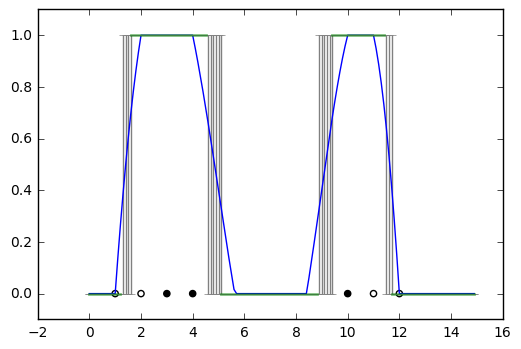

In [17]:
m, _, s = shadowed_learn(x, mu, c=30, d=1, phi=.8, k=GaussianKernel(3), adjustment=0)
shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
shadowed_plot(xx, shadowed)
plt.scatter([c[0] for c in x], [0]*len(x), c=1-np.array(mu), cmap='gray')

plt.ylim(-.1, 1.1)
plt.show()

### Figure 6

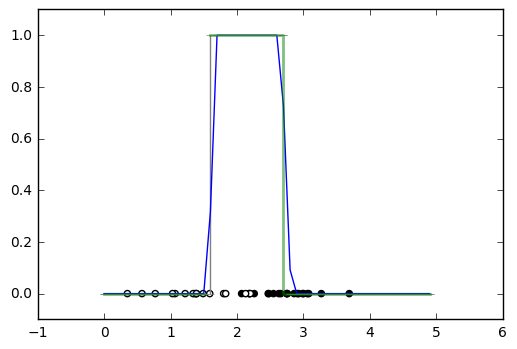

In [18]:
dogs = pd.read_csv('GFR-CKD.csv', index_col='ID Cane')

dogs_values = dogs.ix[:,1:]
dogs_labels = dogs.ix[:,0].values

def to_membership_values(labels, target):
    return [1 if l==target else 0 for l in labels]

mu = {}
for target in (0, 1):
    mu[target] = to_membership_values(dogs_labels, target)

num_feat = 1
assert(num_feat > 0)
x_dogs_flat = dogs.ix[:,num_feat].values
x_dogs = [[i] for i in x_dogs_flat]

mu_dogs = dogs.ix[:,0].values

mu_healthy = mu_dogs
mu_ill = 1 - mu_dogs

m, _, s = shadowed_learn(x_dogs, mu_ill, c=.5, d=.45, phi=1, k=GaussianKernel(.3), adjustment=0)

xx = np.arange(0, 5, 0.1)

shadowed = map(s, xx)
membership = map(m, xx)

plt.plot(xx, membership)
plt.scatter([x[0] for x in x_dogs], [0]*len(x_dogs), c=np.array(mu_ill), cmap='gray')
shadowed_plot(xx, shadowed)
plt.ylim(-.1, 1.1)
plt.show()

### Figure 7

In [19]:
source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(
    filepath_or_buffer=source,
    header=None,
    sep=',')

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # drops the empty line at file-end

iris_df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
iris_values = iris_df.ix[:,0:4].values
iris_labels = iris_df.ix[:,4].values

In [25]:
iris_values_std = StandardScaler().fit_transform(iris_values)
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)

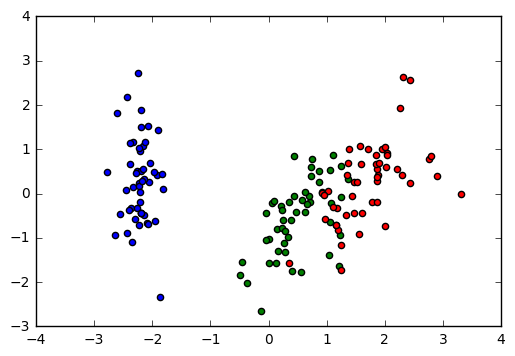

In [26]:
def gr_dataset(): 
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'green', 'red')):
        plt.scatter(iris_values_2d[iris_labels==lab, 0],
                    iris_values_2d[iris_labels==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [27]:
def to_membership_values(labels, target):
    return [1 if l==target else 0 for l in labels]

mu = {}
for target in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    mu[target] = to_membership_values(iris_labels, target)

In [28]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.2, .5, .75, .9), colors='k')
    plt.clabel(membership_contour, inline=1)

In [29]:
def gr_shadowed(estimated_shadowed):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_shadowed((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    plt.contourf(X, Y, Z, levels=[-0.5, 0, 0.5, 1, 1.5], colors=['white', 'lightgray', 'darkgray'])

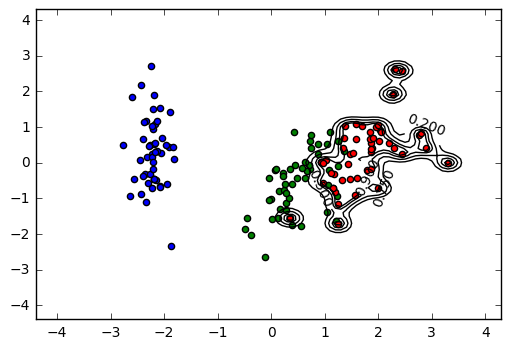

In [450]:
c_virginica = 1
d_virginica = .2
phi_virginica = .6
sigma_virginica = .2

m_virginica, _, s_virginica = shadowed_learn(iris_values_2d,
                                            mu['Iris-virginica'],
                                            c=c_virginica,
                                            d=d_virginica,
                                            phi=phi_virginica,
                                            k=GaussianKernel(sigma_virginica),
                                            adjustment=0)

gr_membership_contour(m_virginica)
gr_dataset()

plt.show()

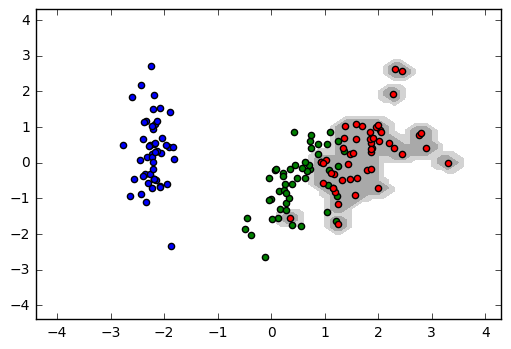

In [451]:
gr_shadowed(s_virginica)
gr_dataset()
plt.show()

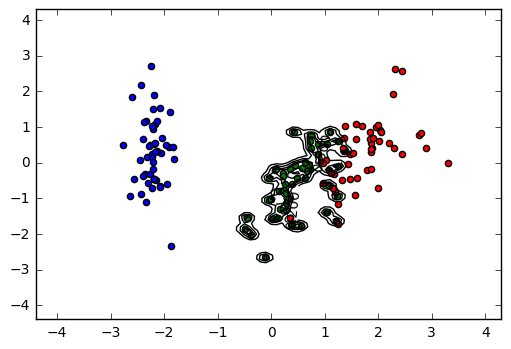

In [452]:
c_versicolor = 2
d_versicolor = .2
phi_versicolor = 1
sigma_versicolor = .1

m_versicolor, _, s_versicolor = shadowed_learn(iris_values_2d,
                                               mu['Iris-versicolor'],
                                               c=c_versicolor,
                                               d=d_versicolor,
                                               phi=phi_versicolor,
                                               k=GaussianKernel(sigma_versicolor),
                                               adjustment=0)

gr_membership_contour(m_versicolor)
gr_dataset()

plt.show()

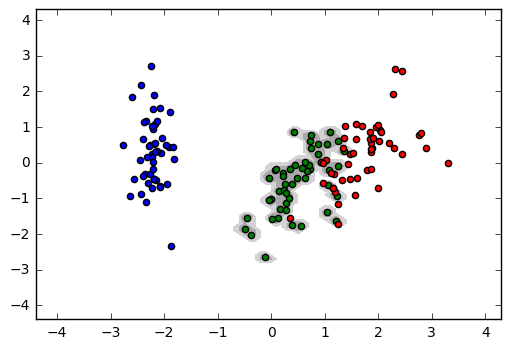

In [453]:
gr_shadowed(s_versicolor)
gr_dataset()
plt.show()

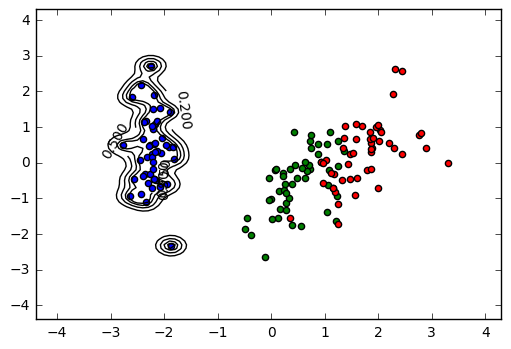

In [454]:
c_setosa = 1
d_setosa = .2
phi_setosa = .6
sigma_setosa = .2

m_setosa, _, s_setosa = shadowed_learn(iris_values_2d,
                                       mu['Iris-setosa'],
                                       c=c_setosa,
                                       d=d_setosa,
                                       phi=phi_setosa,
                                       k=GaussianKernel(sigma_setosa),
                                       adjustment=0)

gr_membership_contour(m_setosa)
gr_dataset()

plt.show()

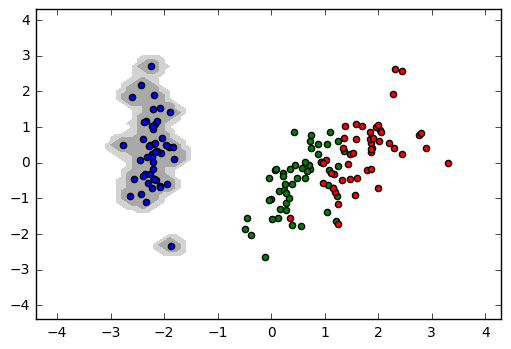

In [455]:
gr_shadowed(s_setosa)
gr_dataset()
plt.show()

### Table 2

In [619]:
def iris_classify(num_components, train_percentage):
    pca = PCA(n_components=num_components)
    iris_values = pca.fit_transform(iris_values_std)
    
    setosa_indices = range(50)
    virginica_indices = range(50, 100)
    versicolor_indices = range(100, 150)

    n = 50

    setosa_permuted_indices = np.random.permutation(setosa_indices)
    virginica_permuted_indices = np.random.permutation(virginica_indices)
    versicolor_permuted_indices = np.random.permutation(versicolor_indices)

    train_indices = np.hstack([setosa_permuted_indices[:int(n*train_percentage)],
                           virginica_permuted_indices[:int(n*train_percentage)],
                           versicolor_permuted_indices[:int(n*train_percentage)]])

    test_indices = np.hstack([setosa_permuted_indices[int(n*train_percentage):],
                          virginica_permuted_indices[int(n*train_percentage):],
                          versicolor_permuted_indices[int(n*train_percentage):]])
    
    n = 150
    
    train_values = [iris_values[i] for i in train_indices]
    test_values = [iris_values[i] for i in test_indices]
    
    classes = ('Iris-virginica', 'Iris-versicolor', 'Iris-setosa')
    mu = {} 
    mu_train = {}
    mu_test = {}
    for target in classes:
        mu[target] = to_membership_values(iris_labels, target)
        mu_train[target] = [mu[target][i] for i in train_indices]
        mu_test[target] = [mu[target][i] for i in test_indices]
        
    
    labels_train = [iris_labels[i] for i in train_indices]
    labels_test = [iris_labels[i] for i in test_indices]
    
    m_virginica, _, s_virginica = shadowed_learn(train_values,
                                                 mu_train['Iris-virginica'],
                                                 c=c_virginica,
                                                 d=d_virginica,
                                                 phi=phi_virginica,
                                                 k=GaussianKernel(sigma_virginica),
                                                 adjustment=0)
    m_versicolor, _, s_versicolor = shadowed_learn(train_values,
                                                   mu_train['Iris-versicolor'],
                                                   c=c_versicolor,
                                                   d=d_versicolor,
                                                   phi=phi_versicolor,
                                                   k=GaussianKernel(sigma_versicolor),
                                                   adjustment=0)
    m_setosa, _, s_setosa = shadowed_learn(train_values,
                                           mu_train['Iris-setosa'],
                                           c=c_setosa,
                                           d=d_setosa,
                                           phi=phi_setosa,
                                           k=GaussianKernel(sigma_setosa),
                                           adjustment=0)

    def gain(item, label):
        guesses = (s_setosa(item), s_virginica(item), s_versicolor(item))
        best_val = max(guesses)
        if label == 'Iris-setosa':
            return 1 if s_setosa(item) == best_val else 0
        if label == 'Iris-virginica':
            return 1 if s_virginica(item) == best_val else 0
        if label == 'Iris-versicolor':
            return 1 if s_versicolor(item) == best_val else 0
        
    train_error = 1-sum([gain(i, l)
                         for i, l in zip(train_values, train_labels)])/float(len(train_labels))
    test_error = 1-sum([gain(i, l)
                        for i, l in zip(test_values, test_labels)])/float(len(test_labels))
    
    return (train_error, test_error)

In [622]:
results = [iris_classify(2, .8) for _ in range(100)]

In [623]:
mean_2d = map(np.mean, np.array(results).T)
med_2d = map(np.median, np.array(results).T)
std_2d = map(np.std, np.array(results).T)

In [624]:
print mean_2d
print med_2d
print std_2d

[0.0, 0.06866666666666664]
[0.0, 0.066666666666666652]
[0.0, 0.039670868124831567]


In [625]:
results_3d = [iris_classify(3, .8) for _ in range(100)]
mean_3d = map(np.mean, np.array(results_3d).T)
med_3d = map(np.median, np.array(results_3d).T)
std_3d = map(np.std, np.array(results_3d).T)

In [626]:
print mean_3d
print med_3d
print std_3d

[0.0, 0.026666666666666658]
[0.0, 0.033333333333333326]
[0.0, 0.025385910352879685]


In [627]:
results_4d = [iris_classify(4, .8) for _ in range(100)]
mean_4d = map(np.mean, np.array(results_4d).T)
med_4d = map(np.median, np.array(results_4d).T)
std_4d = map(np.std, np.array(results_4d).T)

In [628]:
print mean_4d
print med_4d
print std_4d

[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
